# DSCI 100 002-034 Group Project Proposal


## Classifying Gender base on Body Measure Data

## Introduction
<br>
In this group proposal, we will explore a dataset of different body measurements. The dataset for this study consists of measurements from 507 physically active individuals, split into 247 men and 260 women. It includes detailed demographic information (age, sex) and physical characteristics (weight, height, and various body girth measurements). Originating from a study on body dimensions related to physical fitness, it provides a comprehensive view of the human body's shape and size variations. We are going to use this dataset to analyze the correlation between physical attributes and sex to predict the same for new data. We will use histograms and tables to visualize the data initially and investigate it.The project will involve cleaning and preprocessing of the body measurements dataset, with implementation of appropriate algorithms and k-nearest-neighbor classification models to predict the sex of a person.<br><br>

Predictive Question: How can we predict someone's sex based on height, weight and different body measurements?ween physical attributes and gender, leveraging statistical and machine learning techniques to predict gender based on body measurements with high accuracy."


## Preliminary exploratory data analysis:
<br>Demonstrating that the dataset can be read from the web into R 

In [36]:
# Importing the necessary packages
library(tidyverse)
library(repr)
library(tidymodels)
library(gridExtra)
options(repr.matrix.max.rows = 6)


In [37]:
# Reading the tsv file (
# Source : https://www.kaggle.com/datasets/mexwell/body-measurements)
set.seed(20201)
bm_data <- read_tsv("https://www.openintro.org/data/tab-delimited/bdims.txt")
head(bm_data)

Rows: 507 Columns: 25
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
dbl (25): bia_di, bii_di, bit_di, che_de, che_di, elb_di, wri_di, kne_di, an...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


bia_di,bii_di,bit_di,che_de,che_di,elb_di,wri_di,kne_di,ank_di,sho_gi,⋯,bic_gi,for_gi,kne_gi,cal_gi,ank_gi,wri_gi,age,wgt,hgt,sex
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
42.9,26.0,31.5,17.7,28.0,13.1,10.4,18.8,14.1,106.2,⋯,32.5,26.0,34.5,36.5,23.5,16.5,21,65.6,174.0,1
43.7,28.5,33.5,16.9,30.8,14.0,11.8,20.6,15.1,110.5,⋯,34.4,28.0,36.5,37.5,24.5,17.0,23,71.8,175.3,1
40.1,28.2,33.3,20.9,31.7,13.9,10.9,19.7,14.1,115.1,⋯,33.4,28.8,37.0,37.3,21.9,16.9,28,80.7,193.5,1
44.3,29.9,34.0,18.4,28.2,13.9,11.2,20.9,15.0,104.5,⋯,31.0,26.2,37.0,34.8,23.0,16.6,23,72.6,186.5,1
42.5,29.9,34.0,21.5,29.4,15.2,11.6,20.7,14.9,107.5,⋯,32.0,28.4,37.7,38.6,24.4,18.0,22,78.8,187.2,1
43.3,27.0,31.5,19.6,31.3,14.0,11.5,18.8,13.9,119.8,⋯,33.0,28.0,36.6,36.1,23.5,16.9,21,74.8,181.5,1


<br>Cleaning the data into a tidy format

In [38]:
# Tidying and organising the data
set.seed(4321)
bm_tidy <- bm_data |>
            select(sho_gi, che_gi, wai_gi, age, wgt, hgt, sex)|>#selecting relevant columns
            mutate(sex = as.factor(sex)) |>
            mutate(sex = ifelse(sex == 1, "Male", "Female"))

glimpse(bm_tidy)

Rows: 507
Columns: 7
$ sho_gi <dbl> 106.2, 110.5, 115.1, 104.5, 107.5, 119.8, 123.5, 120.4, 111.0, …
$ che_gi <dbl> 89.5, 97.0, 97.5, 97.0, 97.5, 99.9, 106.9, 102.5, 91.0, 93.5, 9…
$ wai_gi <dbl> 71.5, 79.0, 83.2, 77.8, 80.0, 82.5, 82.0, 76.8, 68.5, 77.5, 81.…
$ age    <dbl> 21, 23, 28, 23, 22, 21, 26, 27, 23, 21, 23, 22, 20, 26, 23, 22,…
$ wgt    <dbl> 65.6, 71.8, 80.7, 72.6, 78.8, 74.8, 86.4, 78.4, 62.0, 81.6, 76.…
$ hgt    <dbl> 174.0, 175.3, 193.5, 186.5, 187.2, 181.5, 184.0, 184.5, 175.0, …
$ sex    <chr> "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male",…


In [39]:
# Data splitting
set.seed(4321)
bm_split <- initial_split(bm_tidy, prop = 0.75, strata = sex)
bm_train <- training(bm_split)
bm_test <- testing(bm_split)

glimpse(bm_train)
glimpse(bm_test)

positive_candidates <- bm_train |> 
    group_by(sex) |>
    summarize(n = n())
positive_candidates

Rows: 380
Columns: 7
$ sho_gi <dbl> 95.0, 99.5, 88.0, 97.0, 103.3, 93.5, 94.5, 98.6, 115.5, 97.9, 1…
$ che_gi <dbl> 83.0, 78.5, 75.0, 86.5, 91.0, 79.5, 88.0, 85.0, 98.8, 79.0, 85.…
$ wai_gi <dbl> 66.5, 61.5, 61.2, 78.0, 70.5, 66.5, 74.5, 73.5, 90.5, 66.5, 69.…
$ age    <dbl> 22, 20, 19, 25, 21, 23, 22, 28, 40, 32, 25, 29, 22, 25, 23, 37,…
$ wgt    <dbl> 51.6, 59.0, 49.2, 63.0, 53.6, 59.0, 69.8, 66.8, 75.2, 55.2, 62.…
$ hgt    <dbl> 161.2, 167.5, 159.5, 157.0, 155.8, 170.0, 166.0, 176.2, 160.2, …
$ sex    <chr> "Female", "Female", "Female", "Female", "Female", "Female", "Fe…
Rows: 127
Columns: 7
$ sho_gi <dbl> 104.5, 119.8, 107.5, 116.0, 117.7, 117.9, 112.0, 114.8, 108.0, …
$ che_gi <dbl> 97.0, 99.9, 101.5, 100.0, 99.0, 105.0, 98.4, 97.2, 91.5, 91.2, …
$ wai_gi <dbl> 77.8, 82.5, 78.0, 92.0, 74.5, 74.0, 73.0, 75.0, 72.1, 78.8, 91.…
$ age    <dbl> 23, 21, 23, 22, 22, 25, 23, 22, 24, 22, 29, 36, 46, 23, 62, 21,…
$ wgt    <dbl> 72.6, 74.8, 71.0, 78.8, 66.2, 70.0, 69.1, 67.2, 61.3, 68.6, 82.

sex,n
<chr>,<int>
Female,195
Male,185


sex,count,percentage
<chr>,<int>,<dbl>
Female,195,51.31579
Male,185,48.68421


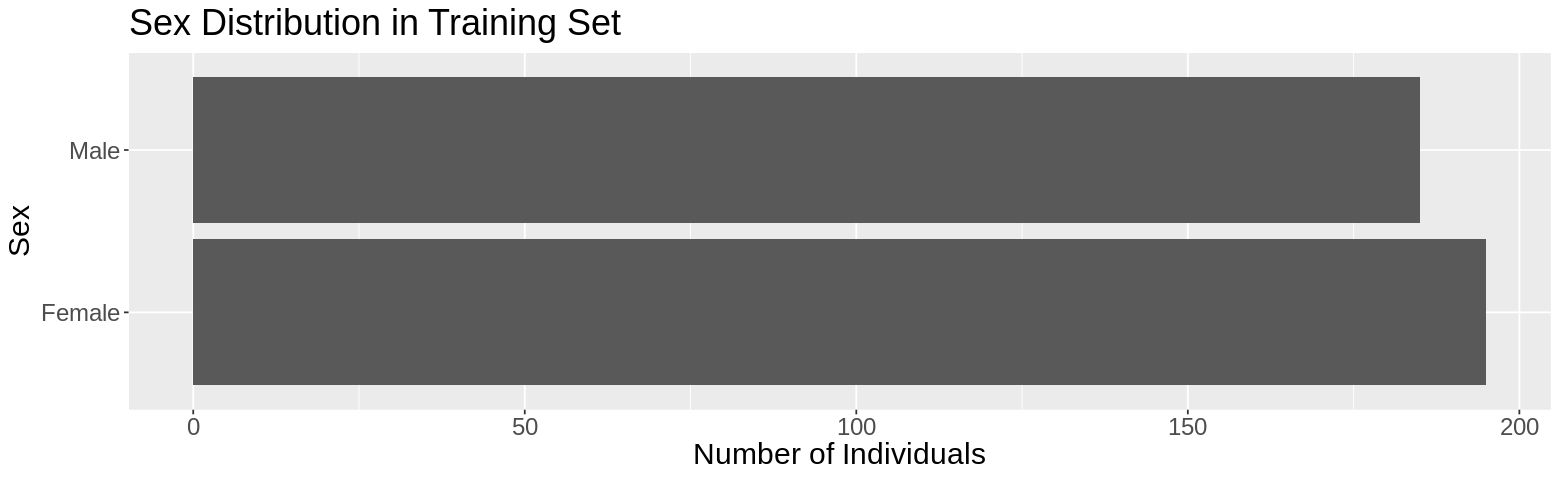

In [40]:
# Class distribution
set.seed(4321)
num_obs <- nrow(bm_train)
sex_count <- bm_train |>
  group_by(sex) |>
  summarize(
    count = n(),
    percentage = n() / num_obs * 100
  )
sex_count

bm_gender_plot <- ggplot(sex_count, aes(x = count, y = sex)) +
    geom_bar(stat = "identity") +
labs(y ="Sex", x="Number of Individuals", title="Sex Distribution in Training Set")+
    theme(text = element_text(size = 18))
bm_gender_plot

In [41]:
# Min and max of predictor variables
set.seed(4321)
minmax_data <- bm_train |>
    group_by(sex) |>
    summarize(count = n(),
             max_height = max(hgt),
             max_age = max(age),
              max_wight = max(wgt),
            max_waist = max(wai_gi),
             max_chest = max(che_gi),
             max_shoulder = max(sho_gi),
             min_height = min(hgt),
             min_age = min(age),
             min_wight = min(wgt),
            min_waist = min(wai_gi),
             min_chest = min(che_gi),
             min_shoulder = min(sho_gi))
minmax_data

sex,count,max_height,max_age,max_wight,max_waist,max_chest,max_shoulder,min_height,min_age,min_wight,min_waist,min_chest,min_shoulder
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Female,195,180.3,67,105.2,101.5,109.0,129.5,147.2,18,42.0,57.9,72.6,85.9
Male,185,198.1,65,116.4,113.2,118.7,134.8,157.2,18,53.9,67.1,79.3,100.2


In [42]:
# Mean of predictor variables
set.seed(4321)
mean_data <- bm_train |>
    group_by(sex) |>
    summarize(count = n(),
             mean_height = mean(hgt),
             mean_age = mean(age),
              mean_wight = mean(wgt),
             mean_waist = mean(wai_gi),
             mean_chest = mean(che_gi),
             mean_shoulder = mean(sho_gi))
mean_data

sex,count,mean_height,mean_age,mean_wight,mean_waist,mean_chest,mean_shoulder
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Female,195,164.9769,28.62564,60.50718,69.92769,85.92359,100.2949
Male,185,177.9443,31.27568,78.65459,84.57730,100.85189,116.3643


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


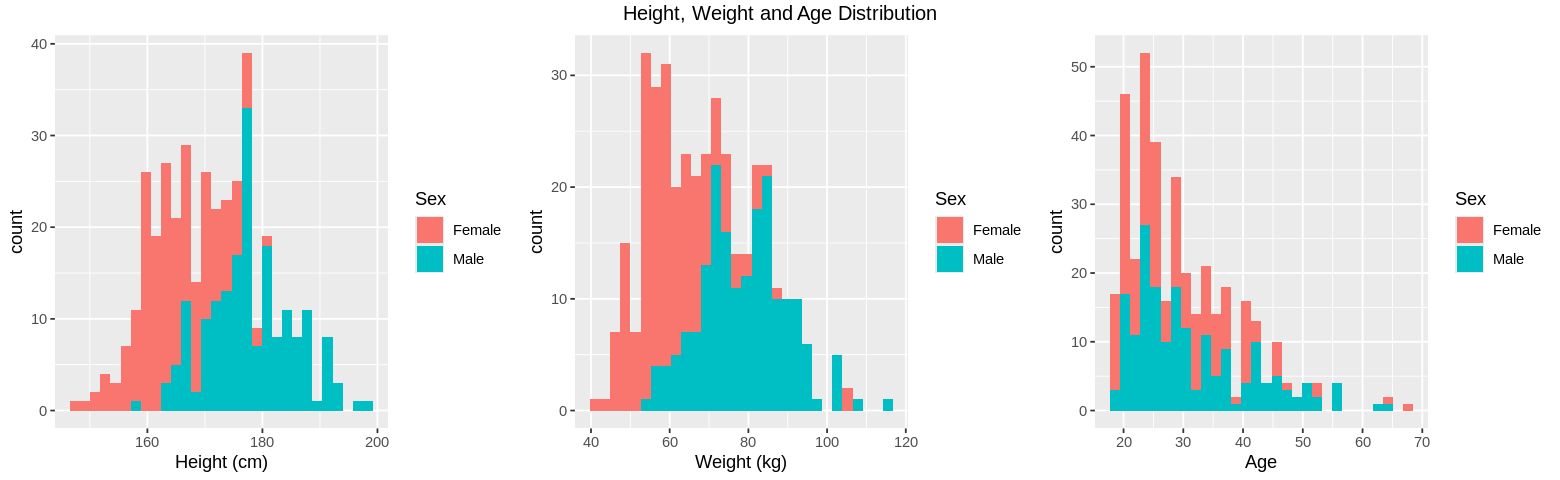

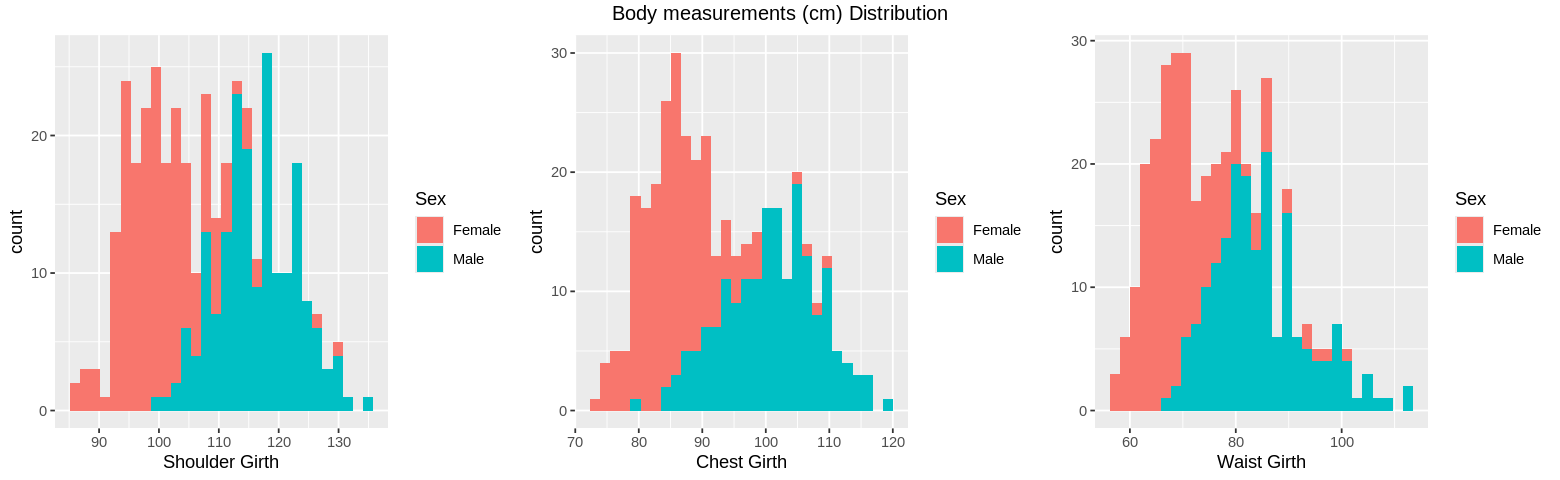

In [43]:
# Data visualisation - comparing the distributions of each of the predictor variables
options(repr.plot.width=13, repr.plot.height=4)
wgt_plot <- ggplot(bm_train, aes(x = wgt, fill = sex)) +
    geom_histogram() + 
    labs(x = 'Weight (kg)', fill = 'Sex')
hgt_plot <- ggplot(bm_train, aes(x = hgt, fill = sex)) +
    geom_histogram() + 
    labs(x = 'Height (cm)', fill = 'Sex')
age_plot <- ggplot(bm_train, aes(x = age, fill = sex)) +
    geom_histogram() + 
    labs(x = 'Age', fill = 'Sex')
sho_plot <- ggplot(bm_train, aes(x = sho_gi, fill = sex)) +
    geom_histogram() + 
    labs(x = 'Shoulder Girth', fill = 'Sex')
che_plot <- ggplot(bm_train, aes(x = che_gi, fill = sex)) +
    geom_histogram() + 
    labs(x = 'Chest Girth', fill = 'Sex')
wai_plot <- ggplot(bm_train, aes(x = wai_gi, fill = sex)) +
    geom_histogram() + 
    labs(x = 'Waist Girth', fill = 'Sex')
grid.arrange(hgt_plot, wgt_plot, age_plot, nrow = 1, top = 'Height, Weight and Age Distribution')
grid.arrange(sho_plot, che_plot, wai_plot, nrow = 1, top = 'Body measurements (cm) Distribution')

## Methods:
Our project aims to establish a classification model for a person's sex based on one's height, weight and body measurements (three different girth measurements picked out initially). Before applying the k-nearest-neighbor classification engine to our data set, we visualed the spread of our data and how each of our predictor variables were spread across each class (male and female). To capture the spread of these predictors, histogram plots of each variable in the data set have been constructed and displayed above, which provide visual information on how they vary among males and females. As clearly seen, males seem to have higher heights and weights as well as bigger girths. But, the age (not a predictor variable) spread is very similar which shows us that the training data is good as one class isn't skewed to one extreme of the graph. The tables produced above also give us an idea of the spread of the data as we explore the mininimun, maximum and mean of our variables seperately for both the classes. The process is achievable using tidyverse functions in R.<br>

Subsequently, these variables will be utilized as predictors to construct a scatter plot for visualization of the correlations. We will scale the variables so that the k-NN is done accurately and the results are not skewed. We will then tune the classifier using 5-fold cross-validation with different K values amd make a plot of K vs accuracy to determine the best K. Then we will use that to predict the testing data, and finally use that to collect metrics and make a confusion matrix to determine the accuracy, precision and recall of our model.

## Expected outcomes and significance:We expect to develop a classification model that can predict the sex of a person given specific details of their body including height, weight and other body measurements with reasonable accuracy. This model will reveal correlations between specific body measurements and the sex of the person and identify the factors that are the most influential. Our classification model can provide valuable insights to people working in different fields including demographics, fashion and the clinical/medicinal field (where knowing the sex of the person is essential to provide appropriate treatment).<br>

However, the analysis may lead to further questions, including:
1) What are the limitations of the model?
2) Are there any other factors that are more influential to a person's sex that the model has not considered?
3) Will this model be useful in different regions with people with different body types and genes? How can we incorporate this variability in body types across the globe into our model to make it more universal?